*Replace this text with your own name and a brief description of what this notebook does.*

## Homework 16-1:   Confidence interval for mothers' heights

We will use the dataset from Lab 16 that contains information about mothers and babies born in California in the 1960s.  See Lab 16 for instructions on downloading and reading it into a dataframe.

The value 99 is used if a mother's height is unknown.

1. Filter the dataset to only contains rows where the mother's height is known.  Hint: filter the dataset to only contain heights less than 99

2. Compute the 95% confidence interval of the mean of the mothers' heights by taking 10,000 bootstrap samples.

3. Plot a histogram of the mean heights of the bootstrap samples.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
# load the babies dataset into the variable babies
babies = pd.read_csv("../../data/babies.data",sep = "\s+")
babies.head()

,bwt,gestation,parity,age,height,weight,smoke
0,120,284,0,27,62,100,0
1,113,282,0,33,64,135,0
2,128,279,0,28,64,115,1
3,123,999,0,36,69,190,0
4,108,282,0,23,67,125,1


In [7]:
# remove all heights of 99
height_filter = babies["height"] < 99
babies_no_missing_heights = babies[height_filter]

In [8]:
# calculate the number of rows in the dataframe
babies_no_missing_heights.shape[0]

1214

In [14]:
# calculate 10,000 bootstrap samples
means = []
for i in range(10000):
    # simulate the bootstrap sample
    bootstrap_sample = babies_no_missing_heights.sample(1214, replace = True)
    # take the mean of the bootstrap sample
    sample_mean = bootstrap_sample["height"].mean()
    # add the mean to the list of means
    means.append(sample_mean)

Text(0,0.5,'# of bootstrap samples')

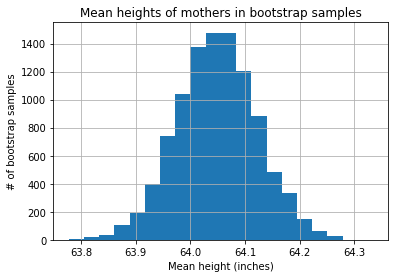

In [18]:
# plot the bootstrap sample means in a histogram
pd.Series(means).hist(bins = 20)
plt.title("Mean heights of mothers in bootstrap samples")
plt.xlabel("Mean height (inches)")
plt.ylabel("# of bootstrap samples")

In [15]:
# compute the left side of the 95% confidence interval
pd.Series(means).quantile(0.025)

63.90444810543657

In [16]:
# compute the right side of the 95% confidence interval
pd.Series(means).quantile(0.975)

64.19357495881384

1. What is the 95% confidence interval of the mean of the mothers' heights?
2. Describe the histogram of the means of the bootstrap samples.

Write your answers below.

1.  The 95% confidence interval is (63.9 inches, 64.2 inches).
2.  The histogram is roughly symmetric, centered and peaking around 64.05 inches.  It looks like a normal distribution.